In [ ]:
!pip install emoji


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 5.2 MB/s eta 0:00:00


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load Dataset

In [ ]:
# Let's first read and inspect the uploaded dataset to understand its structure.
import pandas as pd

# Load the dataset
file_path = '/content/tweets.csv'
df = pd.read_csv(file_path)

# Display the first few rows and summary information of the dataset
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


(   id keyword        location  \
 0   0  ablaze             NaN   
 1   1  ablaze             NaN   
 2   2  ablaze   New York City   
 3   3  ablaze  Morgantown, WV   
 4   4  ablaze             NaN   
 
                                                 text  target  
 0  Communal violence in Bhainsa, Telangana. "Ston...       1  
 1  Telangana: Section 144 has been imposed in Bha...       1  
 2  Arsonist sets cars ablaze at dealership https:...       1  
 3  Arsonist sets cars ablaze at dealership https:...       1  
 4  "Lord Jesus, your love brings freedom and pard...       0  ,
 None)

# Understanding the Structure of the Dataset

In [ ]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB
None


# Check null values

In [ ]:
# Count null values in each column
null_counts = df.isnull().sum()
print(null_counts)


id             0
keyword        0
location    3418
text           0
target         0
dtype: int64


Uppercase letter to lower case letter

In [ ]:
import pandas as pd
import re

# Assuming your data is in a CSV file named 'tweets.csv'
tweets_df = pd.read_csv('tweets.csv') # Load your dataset into tweets_df

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower()

tweets_df['cleaned_text'] = tweets_df['text'].apply(clean_text)
tweets_df.head()

id keyword        location  \
0   0  ablaze             NaN   
1   1  ablaze             NaN   
2   2  ablaze   New York City   
3   3  ablaze  Morgantown, WV   
4   4  ablaze             NaN   

                                                text  target  \
0  Communal violence in Bhainsa, Telangana. "Ston...       1   
1  Telangana: Section 144 has been imposed in Bha...       1   
2  Arsonist sets cars ablaze at dealership https:...       1   
3  Arsonist sets cars ablaze at dealership https:...       1   
4  "Lord Jesus, your love brings freedom and pard...       0   

                                        cleaned_text  
0  communal violence in bhainsa telangana stones ...  
1  telangana section  has been imposed in bhainsa...  
2  arsonist sets cars ablaze at dealership httpst...  
3  arsonist sets cars ablaze at dealership httpst...  
4  lord jesus your love brings freedom and pardon...

# Data Visualization


The dataset is cleaned; now we will tokenize, remove stopwords, and perform lemmatization.

<ipython-input-7-ada3797faa92>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disaster_counts.index, y=disaster_counts.values, palette='viridis')


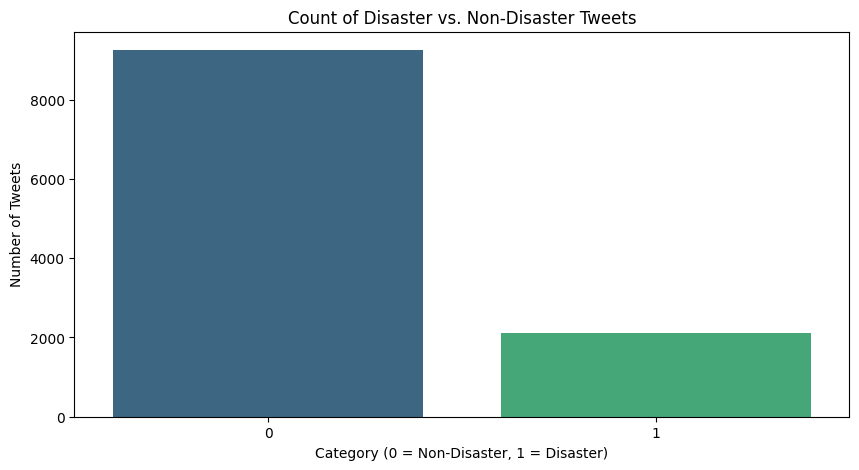

In [ ]:
disaster_counts = tweets_df['target'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=disaster_counts.index, y=disaster_counts.values, palette='viridis')
plt.title('Count of Disaster vs. Non-Disaster Tweets')
plt.xlabel('Category (0 = Non-Disaster, 1 = Disaster)')
plt.ylabel('Number of Tweets')
plt.show()

# Text Preprocessing

1. Load Libraries and NLTK resources

In [ ]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from textblob import TextBlob
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

2. Load and Display Few rows

In [ ]:
file_path = r'/content/tweets.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the original DataFrame
print("Original DataFrame:")
print(df.head())

# Display the column names to confirm
print("\nColumns in DataFrame:", df.columns.tolist())

Original DataFrame:
   id keyword        location  \
0   0  ablaze             NaN   
1   1  ablaze             NaN   
2   2  ablaze   New York City   
3   3  ablaze  Morgantown, WV   
4   4  ablaze             NaN   

                                                text  target  
0  Communal violence in Bhainsa, Telangana. "Ston...       1  
1  Telangana: Section 144 has been imposed in Bha...       1  
2  Arsonist sets cars ablaze at dealership https:...       1  
3  Arsonist sets cars ablaze at dealership https:...       1  
4  "Lord Jesus, your love brings freedom and pard...       0  

Columns in DataFrame: ['id', 'keyword', 'location', 'text', 'target']


# 3. Clean DataFrame

In [ ]:
df_clean = df.dropna(subset=['text'])

# 4. Applied Preprocessing Functions
(1) Lowercasing
(2) Removing URLs
(3) Removing Hashtags
(4) Removing Punctuation
(5) Removing Numbers
(6) Tokenizing
(7) Removing stopwords
(8) Lemmatization
(9) Removing extra whitespace

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_tweet(tweet):
    tweet = re.sub(r'http\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'@\S+', '', tweet)  # Remove mentions
    tweet = re.sub(r'#\S+', '', tweet)  # Remove hashtags (optional)
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)  # Remove punctuation and special characters
    tweet = tweet.lower()  # Convert to lowercase
    tweet = ' '.join([lemmatizer.lemmatize(word) for word in tweet.split() if word not in stop_words])  # Lemmatize and remove stop words
    return tweet

df_clean['processed_tweet'] = df_clean['processed_tweet'].apply(preprocess_tweet)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


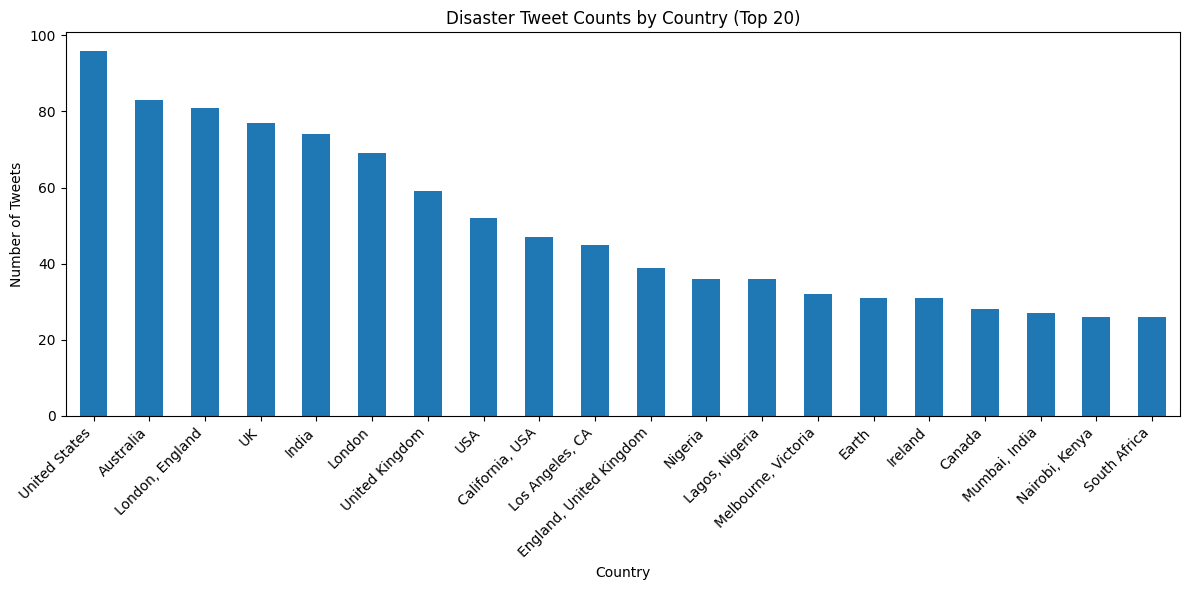

In [37]:
# prompt: country with disaster visualisation

# Assuming you have a 'location' column in your dataframe
# If not, replace 'location' with the actual column name representing location

# Count occurrences of each country
country_counts = df['location'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
country_counts.head(20).plot(kind='bar') # Plotting top 20 countries for better visualization
plt.title('Disaster Tweet Counts by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


# Alternative visualization: World map with colored countries based on tweet count
# Requires geopandas and other libraries

# Install geopandas if you don't have it
# !pip install geopandas

# import geopandas as gpd
# import matplotlib.pyplot as plt

# # Load world map data
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# # Merge tweet counts with the world map
# # (This step requires mapping country names from your data to country names in the world map data)
# # The exact process here will depend on the format of your 'location' data

# # Example (assuming you have a 'country_name' column matching world map names)
# merged_data = world.merge(country_counts, left_on='name', right_index=True, how='left')

# # Fill missing values with 0
# merged_data['location'] = merged_data['location'].fillna(0)

# # Plot the map
# fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# merged_data.plot(column='location', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# plt.title('Disaster Tweet Counts by Country')
# plt.show()

# Common Keywords in Tweets

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-36-32d638891efc>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='magma')


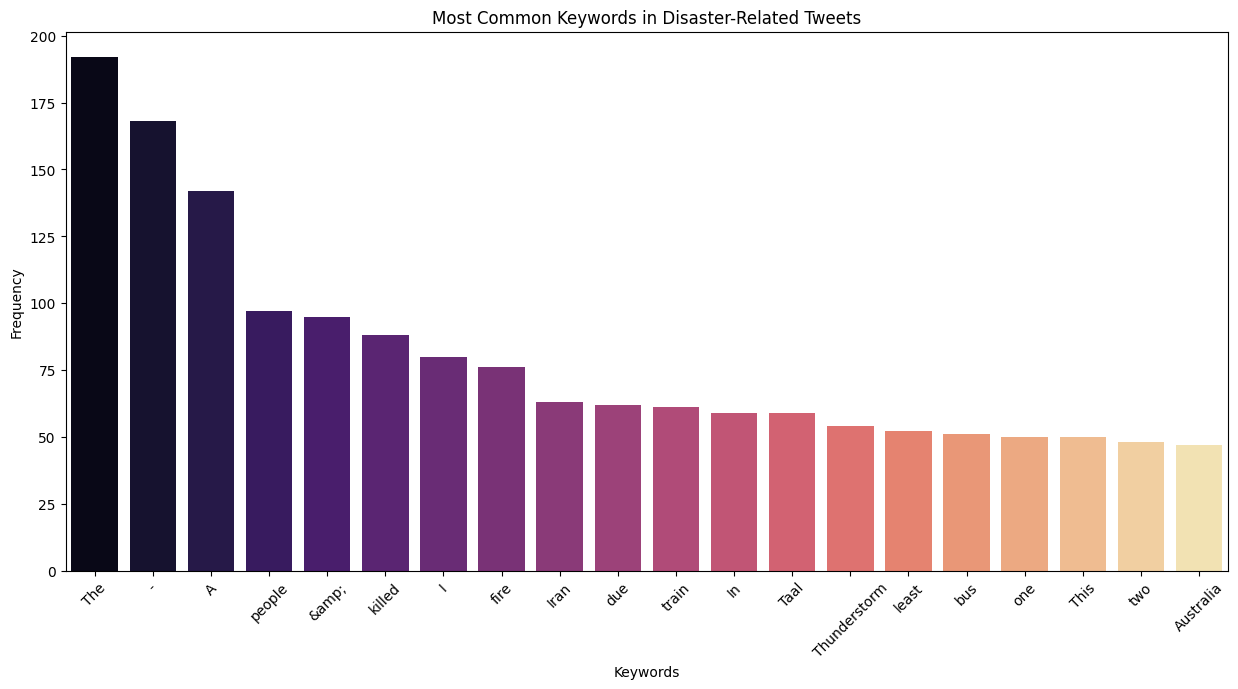

In [ ]:
# Finding the most common keywords in disaster-related tweets
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
disaster_tweets = df[df['target'] == 1]['text']
all_words = ' '.join(disaster_tweets).split()
filtered_words = [word for word in all_words if word not in stop_words]
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)

# Plotting the most common keywords
words, counts = zip(*common_words)
plt.figure(figsize=(15, 7))
sns.barplot(x=list(words), y=list(counts), palette='magma')
plt.title('Most Common Keywords in Disaster-Related Tweets')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Save the cleaned dataset to a new CSV file
df_clean.to_csv('cleaned_tweets.csv', index=False) # Changed 'dataset' to 'df_clean'

# Adasyn(Smote Technique)

In [31]:
# Import necessary libraries
!pip install imbalanced-learn
from imblearn.over_sampling import ADASYN
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=3, n_repeated=2, n_classes=2, weights=[0.9, 0.1])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize ADASYN
adasyn = ADASYN(random_state=42)

# Resample the training data
X_res, y_res = adasyn.fit_resample(X_train, y_train)

# Print the original and resampled dataset shapes
print("Original dataset shape:", X_train.shape, y_train.shape)
print("Resampled dataset shape:", X_res.shape, y_res.shape)

# Convert the resampled data to a Pandas DataFrame
df_res = pd.DataFrame(np.concatenate((X_res, y_res.reshape(-1, 1)), axis=1))

# Save the resampled data to a CSV file
df_res.to_csv('resampled_data.csv', index=False)


Original dataset shape: (800, 10) (800,)
Resampled dataset shape: (1432, 10) (1432,)


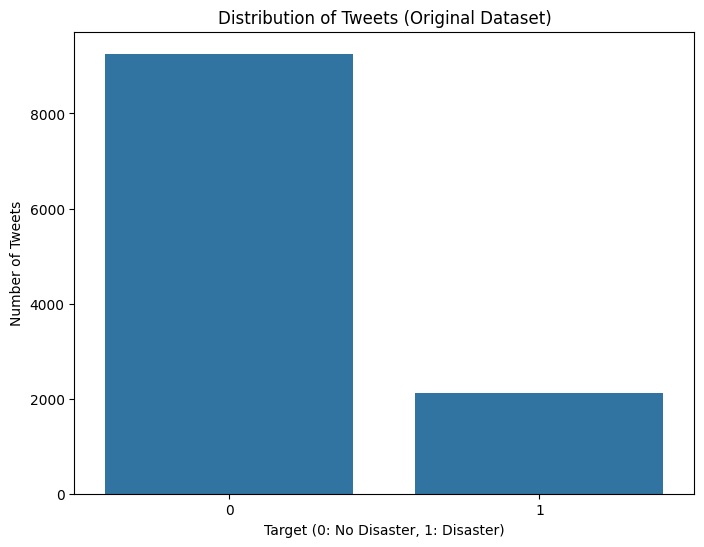

In [32]:
#visualise original dataset

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your original DataFrame (loaded from 'tweets.csv')
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Tweets (Original Dataset)')
plt.xlabel('Target (0: No Disaster, 1: Disaster)')
plt.ylabel('Number of Tweets')
plt.show()

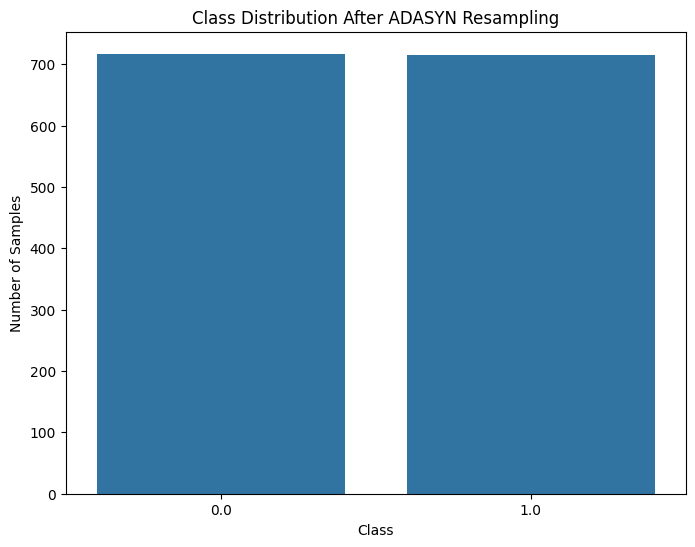

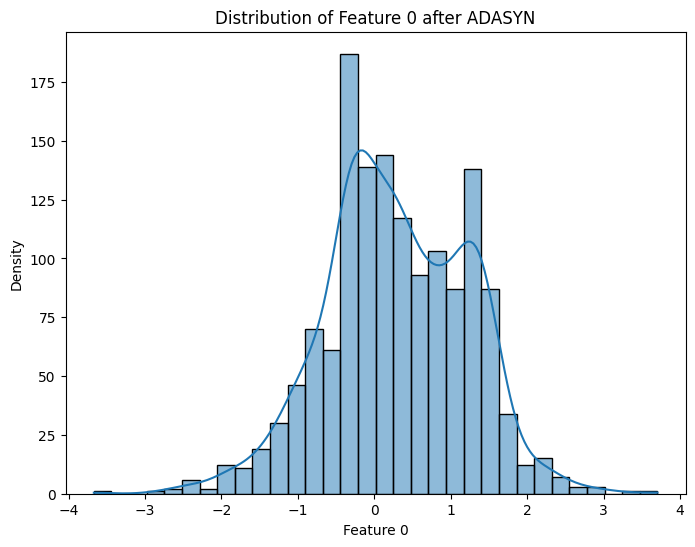

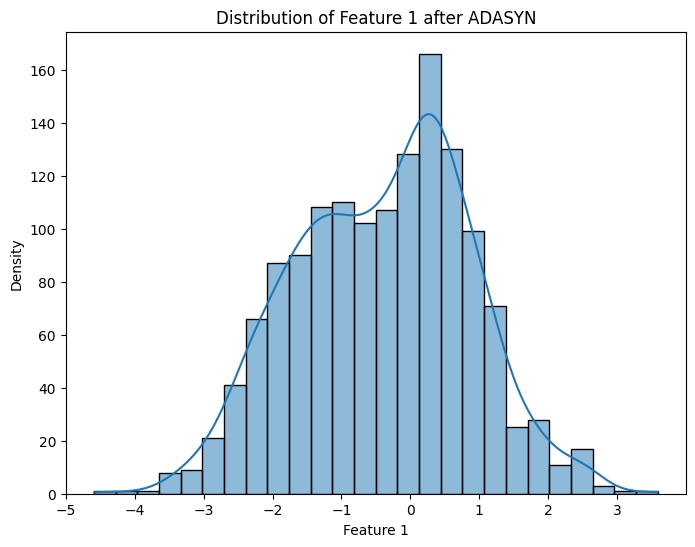

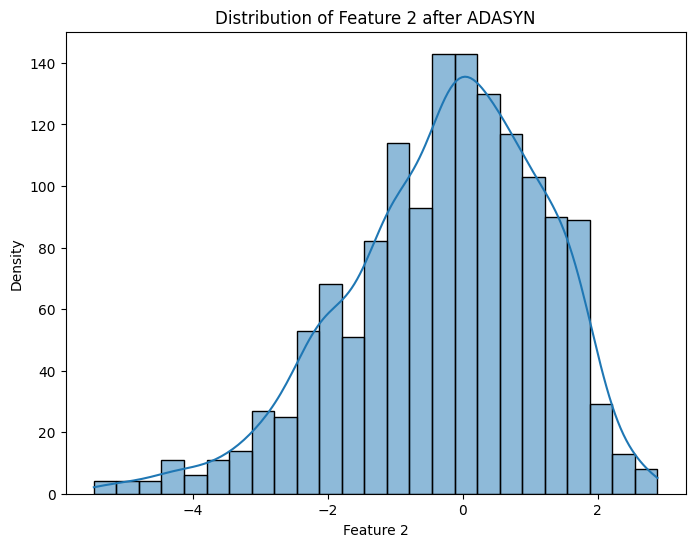

In [33]:
# prompt: visualise resampled data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the resampled data
df_res = pd.read_csv('resampled_data.csv')

# Assuming the last column is the target variable
target_column = df_res.columns[-1]

# Visualize the class distribution in the resampled data
plt.figure(figsize=(8, 6))
sns.countplot(x=target_column, data=df_res)
plt.title('Class Distribution After ADASYN Resampling')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()


# Visualize the distribution of features after resampling (example with first 3 features)
for i in range(3):
    plt.figure(figsize=(8, 6))
    sns.histplot(df_res[df_res.columns[i]], kde=True)
    plt.title(f'Distribution of Feature {df_res.columns[i]} after ADASYN')
    plt.xlabel(f'Feature {df_res.columns[i]}')
    plt.ylabel('Density')
    plt.show()

In [ ]:
#accuracy

from sklearn.metrics import accuracy_score

# Assuming you have already trained a model and made predictions
# Replace 'y_true' and 'y_pred' with your actual true labels and predicted labels

# Example:
y_true = [0, 1, 1, 0, 1]  # True labels
y_pred = [0, 1, 0, 0, 1]  # Predicted labels

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8


#Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Assuming 'df_clean' is your DataFrame with the 'processed_tweet' column
# Create a Bag of Words (BoW) representation
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(df_clean['processed_tweet'])

# Print the vocabulary and the BoW matrix
print("Vocabulary:", vectorizer.vocabulary_)
print("BoW Matrix:\n", bow_matrix.toarray())

# Create a TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_clean['processed_tweet'])

# Print the vocabulary and the TF-IDF matrix
print("Vocabulary:", tfidf_vectorizer.vocabulary_)
print("TF-IDF Matrix:\n", tfidf_matrix.toarray())

Vocabulary: {'communal': 3388, 'violence': 18668, 'bhainsa': 1754, 'telangana': 17236, 'stone': 16561, 'pelted': 12825, 'muslim': 11445, 'house': 8095, 'vehicle': 18535, 'set': 15461, 'ablaze': 43, 'section': 15299, 'imposed': 8424, 'january': 9033, 'clash': 3120, 'erupted': 5681, 'two': 18076, 'group': 7363, 'po': 13220, 'arsonist': 992, 'car': 2617, 'dealership': 4253, 'lord': 10212, 'jesus': 9104, 'love': 10243, 'brings': 2261, 'freedom': 6697, 'pardon': 12658, 'fill': 6307, 'holy': 7983, 'spirit': 16308, 'heart': 7727, 'child': 2973, 'chinese': 2992, 'tweet': 18049, 'would': 19279, 'gone': 7174, 'viral': 18676, 'social': 16066, 'medium': 10799, 'snl': 16031, 'made': 10382, 'racist': 13948, 'several': 15484, 'ngemsibaa': 11789, 'village': 18648, 'oku': 12218, 'sub': 16693, 'division': 4932, 'north': 11944, 'west': 18972, 'region': 14308, 'cameroon': 2562, 'asansol': 1013, 'bjp': 1857, 'office': 12178, 'salanpur': 15004, 'last': 9747, 'night': 11829, 'alleged': 527, 'tmc': 17622, 'be

<ipython-input-36-76fb47301d51>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TF-IDF', y='Word', data=tfidf_df.head(top_n), palette='viridis')


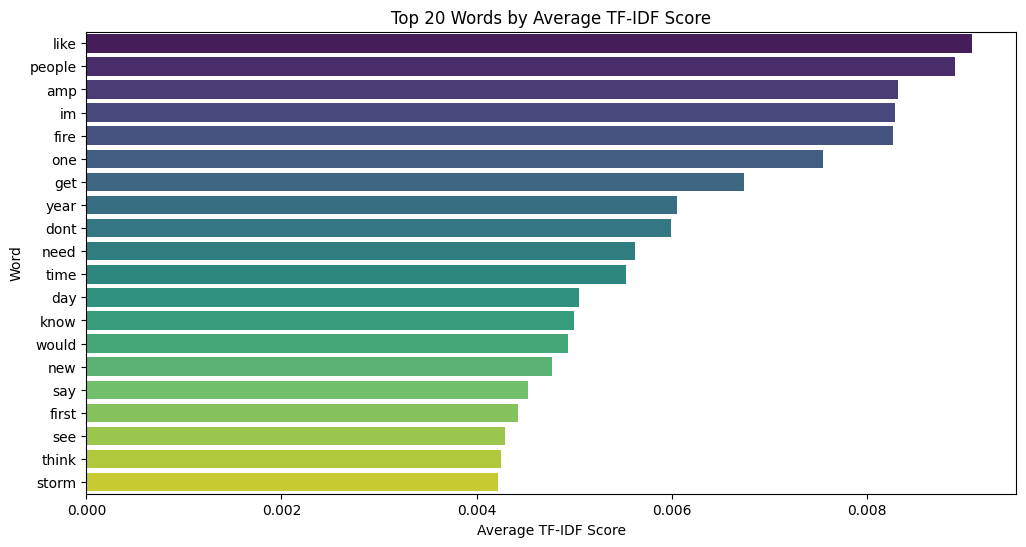

In [36]:
# prompt: visualisation for tf idf

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# Assuming 'df_clean' is your DataFrame with the 'processed_tweet' column
# You might need to replace 'processed_tweet' with the actual column name
# Create a TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()  # Define tfidf_vectorizer here
tfidf_matrix = tfidf_vectorizer.fit_transform(df_clean['processed_tweet'])

feature_names = tfidf_vectorizer.get_feature_names_out()

# Calculate the average TF-IDF score for each word
average_tfidf_scores = np.array(tfidf_matrix.mean(axis=0)).flatten()

# Create a DataFrame for visualization
tfidf_df = pd.DataFrame({'Word': feature_names, 'TF-IDF': average_tfidf_scores})

# Sort by TF-IDF score in descending order
tfidf_df = tfidf_df.sort_values(by='TF-IDF', ascending=False)

# Plot the top N words (e.g., top 20)
top_n = 20
plt.figure(figsize=(12, 6))
sns.barplot(x='TF-IDF', y='Word', data=tfidf_df.head(top_n), palette='viridis')
plt.title(f'Top {top_n} Words by Average TF-IDF Score')
plt.xlabel('Average TF-IDF Score')
plt.ylabel('Word')
plt.show()

# Feature Engineering

In [ ]:
#feature engineering

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# Load the preprocessed data (assuming it's already cleaned and preprocessed)
df_clean = pd.read_csv('cleaned_tweets.csv')

# Drop rows with NaN values in 'processed_tweet' column
df_clean = df_clean.dropna(subset=['processed_tweet'])

# Ensure 'processed_tweet' column contains strings
df_clean['processed_tweet'] = df_clean['processed_tweet'].astype(str)


# 1. TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features
tfidf_features = tfidf_vectorizer.fit_transform(df_clean['processed_tweet'])

# 2. Word2Vec Vectorization
tokenized_tweets = df_clean['processed_tweet'].apply(word_tokenize).tolist()
word2vec_model = Word2Vec(sentences=tokenized_tweets, vector_size=100, window=5, min_count=1, workers=4) # Adjust parameters

def get_word2vec_features(tokens):
    vectors = [word2vec_model.wv[token] for token in tokens if token in word2vec_model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

word2vec_features = np.array([get_word2vec_features(word_tokenize(tweet)) for tweet in df_clean['processed_tweet']])


# 3. Sentiment Analysis (using TextBlob)
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df_clean['sentiment'] = df_clean['processed_tweet'].apply(get_sentiment)


# 4.  Number of words/characters
df_clean['word_count'] = df_clean['processed_tweet'].apply(lambda x: len(str(x).split()))
df_clean['char_count'] = df_clean['processed_tweet'].apply(lambda x: len(str(x)))
# ... (your existing code) ...

# Add N-gram features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2)) # Include 1-grams and 2-grams
tfidf_features = tfidf_vectorizer.fit_transform(df_clean['processed_tweet'])

# ... (rest of your code) ...


# Combine all features
# Assuming tfidf_features is a sparse matrix, convert to dense array first
combined_features = np.hstack([tfidf_features.toarray(), word2vec_features, df_clean[['sentiment', 'word_count', 'char_count']].values])

print(f"Shape of combined features: {combined_features.shape}")

Shape of combined features: (11367, 5103)


#ML model XGBOOST

In [ ]:
# prompt: xgboost for better accuracy

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

# ... (your existing code) ...

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, df_clean['target'], test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42) # Use appropriate objective for your task
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy}")

XGBoost Accuracy: 0.8786279683377308


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# ... (your existing code for feature engineering and combined_features) ...

# 1. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    combined_features, df_clean['target'], test_size=0.2, random_state=42
)

# 2. Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# 3. Train and evaluate each classifier
results = {}
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")

# 4. Compare accuracies
print("\nAccuracy Comparison:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy}")

KNN Accuracy: 0.7946350043975374
Logistic Regression Accuracy: 0.8786279683377308
SVM Accuracy: 0.8214599824098505
Random Forest Accuracy: 0.8795074758135444
XGBoost Accuracy: 0.8786279683377308

Accuracy Comparison:
KNN: 0.7946350043975374
Logistic Regression: 0.8786279683377308
SVM: 0.8214599824098505
Random Forest: 0.8795074758135444
XGBoost: 0.8786279683377308


In [ ]:
import pandas as pd

# Assuming 'results' dictionary is already populated from the previous code
results = {'KNN': 0.79, 'Logistic Regression': 0.88, 'SVM': 0.82, 'Random Forest': 0.88, 'XGBoost': 0.88}

# Create a DataFrame from the 'results' dictionary
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])

# Display the DataFrame
results_df

Model  Accuracy
0                  KNN      0.79
1  Logistic Regression      0.88
2                  SVM      0.82
3        Random Forest      0.88
4              XGBoost      0.88